# HW3

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Cleaning

- Read the data from `hw3.csv`

In [2]:
data = pd.read_csv('hw3.csv')

In [3]:
data['ts'] = pd.to_datetime(data['ts'])
data = data.sort_values('ts', ignore_index=True)
data

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,210.3120,NaN,208.4320,208.6760,70031.618000,NaN,SOL,SOL
1,2021-12-01 00:00:00,280.5900,281.4000,278.3000,278.7000,207.849000,NaN,COMP,ETH
2,2021-12-01 00:00:00,257.1020,260.7750,255.3450,257.0780,2730.299000,NaN,AAVE,ETH
3,2021-12-01 00:00:00,21.2004,21.3115,21.0337,21.2659,12406.133674,NaN,UNI,ETH
4,2021-12-01 00:00:00,57321.4100,57451.0500,56814.3400,56987.9700,388.482022,NaN,BTC,BTC
...,...,...,...,...,...,...,...,...,...
2662,2021-12-13 06:00:00,3.8700,3.8700,3.8200,NaN,45270.080000,NaN,CRV,ETH
2663,2021-12-13 06:00:00,3.8700,3.8700,3.8200,NaN,45270.080000,NaN,CRV,ETH
2664,2021-12-13 06:00:00,4020.1000,4021.9900,NaN,4014.9000,1344.134433,NaN,ETH,ETH
2665,2021-12-13 06:00:00,193.1100,193.2300,192.5300,193.0100,99.653000,NaN,COMP,ETH


- Remove duplicates

In [4]:
data.duplicated().sum()

307

In [5]:
data = data.drop_duplicates(ignore_index=True)

- Explore the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ts         2360 non-null   datetime64[ns]
 1   open       2360 non-null   float64       
 2   high       1910 non-null   float64       
 3   low        2104 non-null   float64       
 4   close      2244 non-null   float64       
 5   volume     2360 non-null   float64       
 6   volumeUSD  0 non-null      float64       
 7   token      2360 non-null   object        
 8   chain      2360 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 166.1+ KB


In [7]:
data.token.unique()

array(['SOL', 'COMP', 'AAVE', 'UNI', 'BTC', 'ETH', 'USDT', 'CRV',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">BTC</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">COMP</span>'], dtype=object)

In [8]:
data.token.value_counts()

COMP                                  286
BTC                                   283
SOL                                   281
AAVE                                  280
CRV                                   279
USDT                                  278
UNI                                   270
ETH                                   270
<span name="tokenName">ETH</span>      25
<span name="tokenName">UNI</span>      25
<span name="tokenName">USDT</span>     17
<span name="tokenName">CRV</span>      16
<span name="tokenName">AAVE</span>     15
<span name="tokenName">SOL</span>      14
<span name="tokenName">BTC</span>      12
<span name="tokenName">COMP</span>      9
Name: token, dtype: int64

- Reformat the token names

In [9]:
data.loc[data['token'].str.contains('<\/span>'), 'token'] = data.loc[data['token'].str.contains('<\/span>'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>').values

/Users/loremaid/anaconda3/envs/mfe-preprogram/lib/python3.8/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


- Detect outliers
    - `close` has min smaller than `low` and max greater than `high`

In [10]:
data[data.chain == 'SOL'].describe()

,open,high,low,close,volume,volumeUSD
count,295.000000,227.000000,260.000000,282.000000,295.000000,0.0
mean,195.639932,198.034233,193.611042,330.800901,69868.818254,NaN
std,20.336736,21.005162,20.145968,1653.395209,49019.925065,NaN
min,165.280000,167.800000,161.510000,1.700800,10545.390000,NaN
25%,180.113500,182.191500,178.060000,178.565000,42120.832000,NaN
50%,192.419000,194.796000,189.951000,191.729500,59617.989000,NaN
75%,208.164000,213.484500,204.418000,208.410000,83899.774000,NaN
max,242.099000,243.287000,237.442000,20010.000000,534212.095000,NaN


In [11]:
data[data.chain == 'ETH'].describe()

,open,high,low,close,volume,volumeUSD
count,1475.000000,1209.000000,1320.000000,1400.000000,1.475000e+03,0.0
mean,941.979287,935.802572,939.424383,1345.153640,6.583038e+04,NaN
std,1666.040953,1668.994465,1656.885357,11712.564325,1.418310e+05,NaN
min,3.263900,3.387200,3.070000,0.035700,6.717800e+01,NaN
25%,16.065450,16.084700,15.877500,16.064500,1.607127e+03,NaN
50%,188.340000,191.130000,185.265000,187.955000,8.431761e+03,NaN
75%,265.220500,266.107000,264.248750,268.045000,5.995019e+04,NaN
max,4772.600000,4784.500000,4722.020000,431046.000000,1.901496e+06,NaN


In [12]:
data[data.chain == 'BTC'].describe()

,open,high,low,close,volume,volumeUSD
count,295.000000,235.000000,261.000000,2.860000e+02,295.000000,0.0
mean,51136.890644,51500.749660,50768.519004,1.717696e+05,732.513137,NaN
std,3398.262020,3399.108056,3442.389444,7.705806e+05,641.400685,NaN
min,46588.660000,47500.000000,42333.000000,4.768632e+02,123.274547,NaN
25%,48711.720000,48987.655000,48385.010000,4.865738e+04,372.599339,NaN
50%,49576.620000,49927.650000,49244.460000,4.953276e+04,599.791578,NaN
75%,53283.710000,53961.515000,52621.610000,5.347901e+04,917.030358,NaN
max,58664.400000,58783.160000,58445.530000,5.688883e+06,8420.715164,NaN


In [13]:
data[data.chain == 'USDT'].describe()

,open,high,low,close,volume,volumeUSD
count,295.000000,239.000000,263.000000,276.000000,2.950000e+02,0.0
mean,1.000889,1.001236,1.000737,1.356350,3.412913e+06,NaN
std,0.000448,0.001917,0.000303,5.965581,3.402121e+06,NaN
min,1.000200,1.000400,1.000200,0.010005,2.480765e+05,NaN
25%,1.000600,1.000700,1.000500,1.000600,1.820757e+06,NaN
50%,1.000800,1.000900,1.000700,1.000900,2.628158e+06,NaN
75%,1.001100,1.001200,1.000900,1.001100,3.752916e+06,NaN
max,1.005400,1.025000,1.001700,100.100000,3.282850e+07,NaN


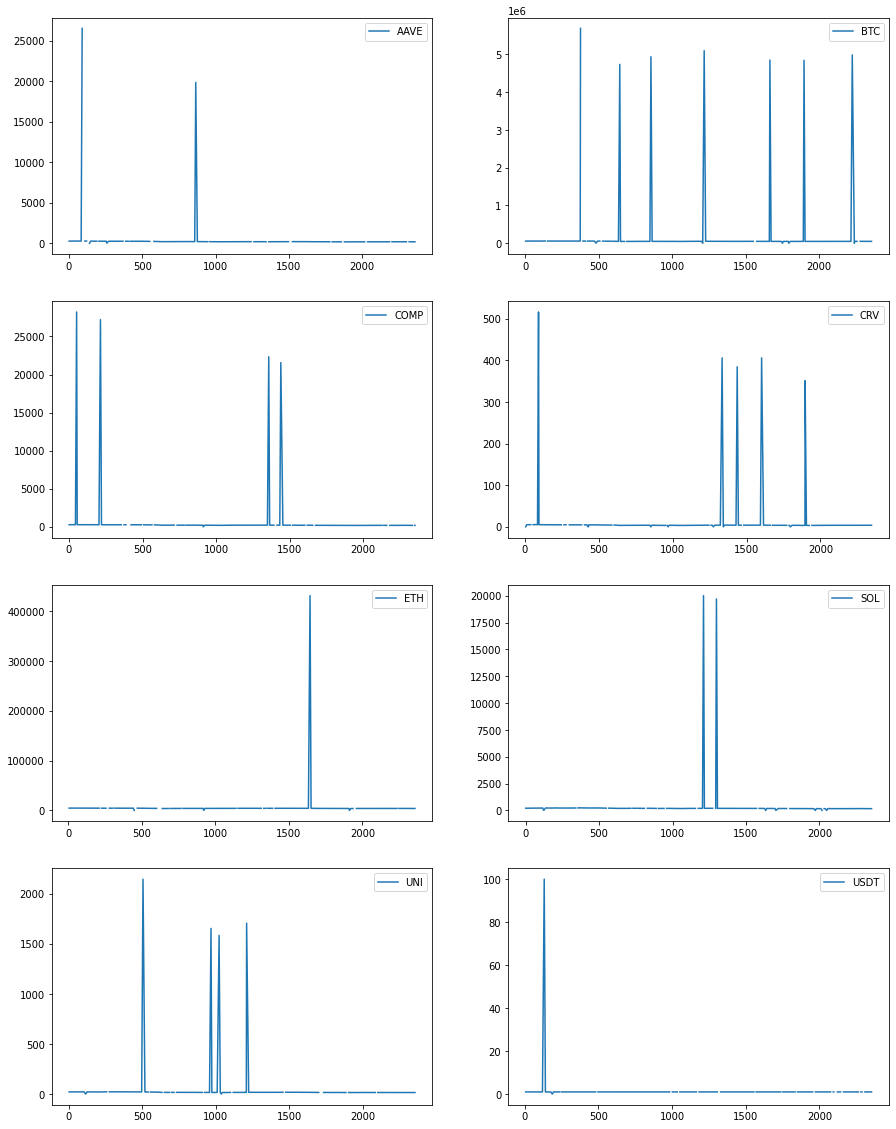

In [14]:
tokens = data.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens.size / 2)))

idx = 0
for label, data_token in data[['token', 'close']].groupby('token'):
    data_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

- Outlier handling

In [15]:
data['close'][(data['close'] < data['low']) | (data['close'] > data['high'])] = np.nan
data['close'][(data['close'] < 0.2 * data['open']) | (data['close'] > 2 * data['open'])] = np.nan

/var/folders/hz/__g0fklx0pb5bh5z3zn0wgcm0000gn/T/ipykernel_12600/2096197194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close'][(data['close'] < data['low']) | (data['close'] > data['high'])] = np.nan
/Users/loremaid/anaconda3/envs/mfe-preprogram/lib/python3.8/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/hz/__g0fklx0pb5bh5z3zn0wgcm0000gn/T/ipykernel_12600/2096197194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

- Missing value handling

In [16]:
data['close'] = data['close'].fillna((data['high'] + data['low']) / 2)
data['close'] = data.groupby('token')['close'].fillna(data.groupby('token')['open'].shift(-1))

/var/folders/hz/__g0fklx0pb5bh5z3zn0wgcm0000gn/T/ipykernel_12600/3881094476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close'] = data['close'].fillna((data['high'] + data['low']) / 2)
/var/folders/hz/__g0fklx0pb5bh5z3zn0wgcm0000gn/T/ipykernel_12600/3881094476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close'] = data.groupby('token')['close'].fillna(data.groupby('token')['open'].shift(-1))


- Re-examine the data

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ts         2360 non-null   datetime64[ns]
 1   open       2360 non-null   float64       
 2   high       1910 non-null   float64       
 3   low        2104 non-null   float64       
 4   close      2360 non-null   float64       
 5   volume     2360 non-null   float64       
 6   volumeUSD  0 non-null      float64       
 7   token      2360 non-null   object        
 8   chain      2360 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 166.1+ KB


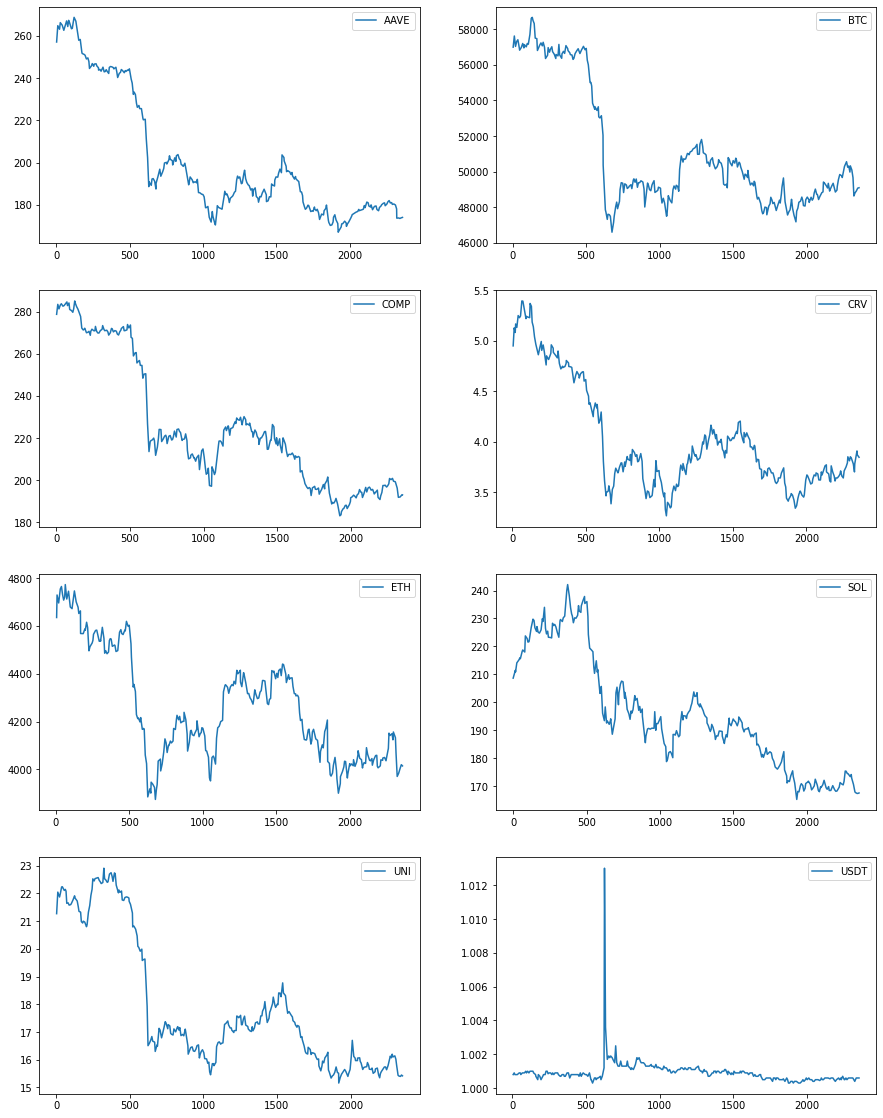

In [18]:
tokens = data.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens.size / 2)))

idx = 0
for label, data_token in data[['token', 'close']].groupby('token'):
    data_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

## Computation

- Calculate volumeUSD by chain

In [19]:
data['volumeUSD'] = data['volume'] * data['close']

/var/folders/hz/__g0fklx0pb5bh5z3zn0wgcm0000gn/T/ipykernel_12600/1155033192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['volumeUSD'] = data['volume'] * data['close']


In [20]:
data

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,210.3120,NaN,208.4320,208.6760,70031.618000,1.461392e+07,SOL,SOL
1,2021-12-01 00:00:00,280.5900,281.4000,278.3000,278.7000,207.849000,5.792752e+04,COMP,ETH
2,2021-12-01 00:00:00,257.1020,260.7750,255.3450,257.0780,2730.299000,7.018998e+05,AAVE,ETH
3,2021-12-01 00:00:00,21.2004,21.3115,21.0337,21.2659,12406.133674,2.638276e+05,UNI,ETH
4,2021-12-01 00:00:00,57321.4100,57451.0500,56814.3400,56987.9700,388.482022,2.213880e+07,BTC,BTC
...,...,...,...,...,...,...,...,...,...
2355,2021-12-13 06:00:00,167.4800,167.8000,166.9300,167.6400,11191.365000,1.876120e+06,SOL,SOL
2356,2021-12-13 06:00:00,49065.4500,49108.3300,48970.1000,49087.7600,123.274547,6.051271e+06,BTC,BTC
2357,2021-12-13 06:00:00,3.8700,3.8700,3.8200,3.8450,45270.080000,1.740635e+05,CRV,ETH
2358,2021-12-13 06:00:00,4020.1000,4021.9900,NaN,4014.9000,1344.134433,5.396565e+06,ETH,ETH


In [21]:
volumeUSD_by_chain = data.groupby(['ts', 'chain'])['volumeUSD'].sum().reset_index()
volumeUSD_by_chain

,ts,chain,volumeUSD
0,2021-12-01 00:00:00,BTC,2.213880e+07
1,2021-12-01 00:00:00,ETH,3.057435e+07
2,2021-12-01 00:00:00,SOL,1.461392e+07
3,2021-12-01 00:00:00,USDT,1.589673e+06
4,2021-12-01 01:00:00,BTC,3.455784e+07
...,...,...,...
1175,2021-12-13 05:00:00,USDT,2.180062e+06
1176,2021-12-13 06:00:00,BTC,6.051271e+06
1177,2021-12-13 06:00:00,ETH,5.721253e+06
1178,2021-12-13 06:00:00,SOL,1.876120e+06
